In [30]:
# Import libraries
import sys
import scipy
import numpy
import pandas
import matplotlib
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [7]:
# Dataset Summary

# 1) Shape
dataset.shape

(150, 5)

In [8]:
# 2) Snippet of the data
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# 3) Statistical Summary
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Ranges between 0-8 centimeters

# 4) Class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

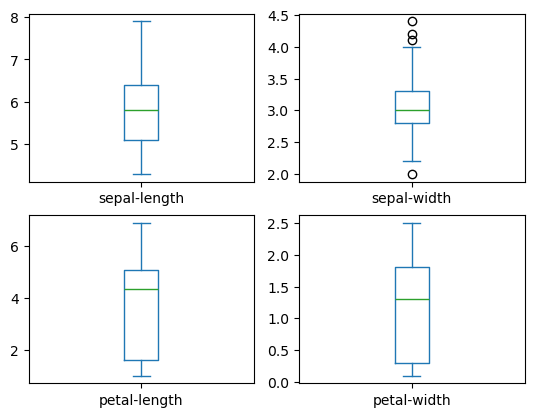

In [12]:
# Each class has the same number of instances

# Data Visualization

# Univariate plots to better understand each attribute
# 1) Box-and-Whiskers plot
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

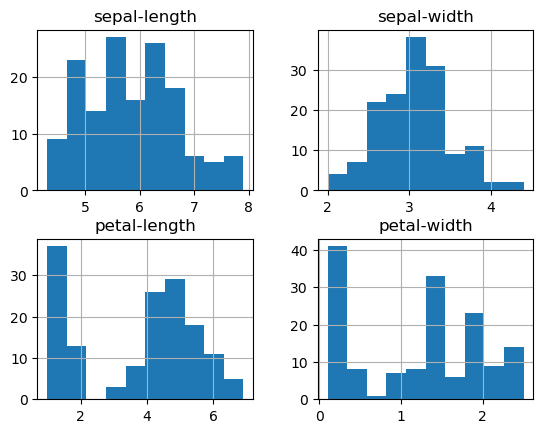

In [13]:
# 2) Histogram
dataset.hist()
plt.show()

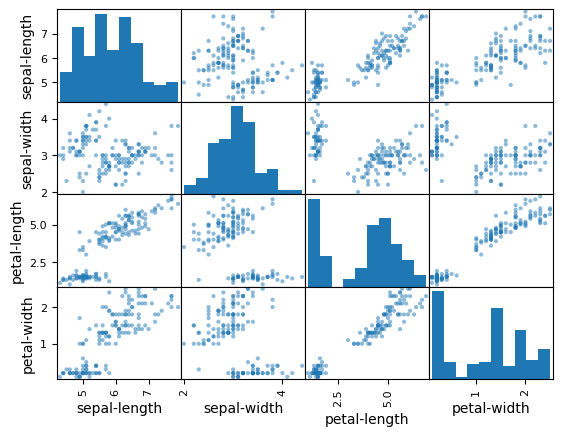

In [14]:
# Looks like perhaps two of the variables have Gaussian Distribution

# Multivariate plots to understand relationship between variables
# 1) Scatter plot
scatter_matrix(dataset)
plt.show()

In [22]:
# Evaluate algorithms

# Split dataset into training and validation
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [31]:
# Build and evaluate 6 different models
models = []
models.append(('LR:', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA:', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR:: 0.941667 (0.065085)
LDA:: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


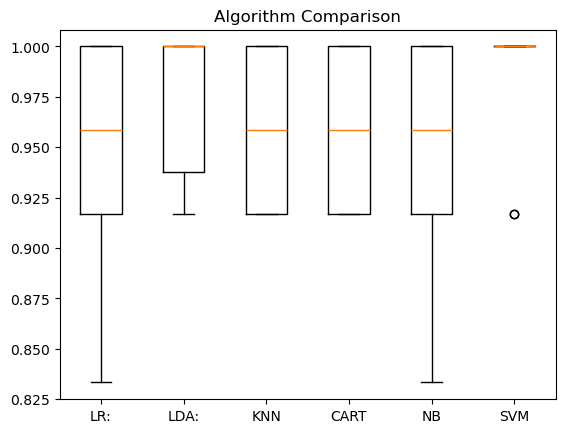

In [32]:
# Support Vector Machines has the largest accuracy at 0.98

# Compare Algorithms
plt.boxplot(results, labels = names)
plt.title('Algorithm Comparison')
plt.show()

In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [29]:
# Evaluate predictions
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

